In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Exploratory Data Analysis and Data Preprocessing

### 1. Loading the dataset

In [2]:
df = pd.read_csv('creditcard.csv')

### 2. Viewing the first 5 entries of the dataset

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

### 3. Getting the dataset shape

In [4]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


### 4. A peek at the dataset

In [5]:
df.sample(5)
# df.sample returns a random sample of items from an axis of the object

Time        V1        V2        V3        V4        V5        V6  \
184018  126056.0  2.007609 -0.014725 -0.857372  1.824368  0.188343  0.055245   
90406    63007.0 -0.432252  0.989247  1.446160 -0.226088  0.146466 -0.379795   
79070    57847.0  1.296451  0.676088 -0.704434  1.157857  0.460439 -0.772667   
277390  167624.0  2.025858 -0.007107 -1.098014  0.435970 -0.027425 -1.126731   
158534  111415.0  2.070716  0.182594 -1.750051  0.394342  0.750994 -0.241223   

              V7        V8        V9  ...       V21       V22       V23  \
184018 -0.140535 -0.051169 -0.646238  ...  0.013991  0.209744  0.107892   
90406   0.600798  0.100190 -0.636209  ... -0.197621 -0.541561 -0.074444   
79070   0.268902 -0.170553  0.023031  ... -0.127210 -0.307136 -0.222880   
277390  0.269690 -0.344766  0.664664  ... -0.240144 -0.510796  0.288210   
158534 -0.047516 -0.117084  1.610292  ... -0.500210 -1.138454  0.284544   

             V24       V25       V26       V27       V28  Amount  Class  
184018 -0.351920 -0.294630  2.347521 -0.196798 -0.099440    3.79      0  
90406  -0.021017 -0.178752  0.074313  0.261007  0.107505    3.58      0  
79070  -0.599123  0.790547 -0.274083  0.031711  0.048187    1.00      0  
277390 -0.031786 -0.114408 -0.583183 -0.004859 -0.047597    9.99      0  
158534 -0.074886 -0.259209  0.147028 -0.096209 -0.052930    0.89      0  

[5 rows x 31 columns]

### 5. Finding more details of the dataset 

In [6]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking if there are any null values in our dataset
df.isnull().values.any()

False

In [8]:
# numerical summary -> only non-anonymized columns of interest (not the columns encoded by PCA)
pd.set_option('precision', 3) # to get the result upto 3 decimal places
df.loc[:, ['Time', 'Amount']].describe() # Statistics of the columns not encoded by PCA

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

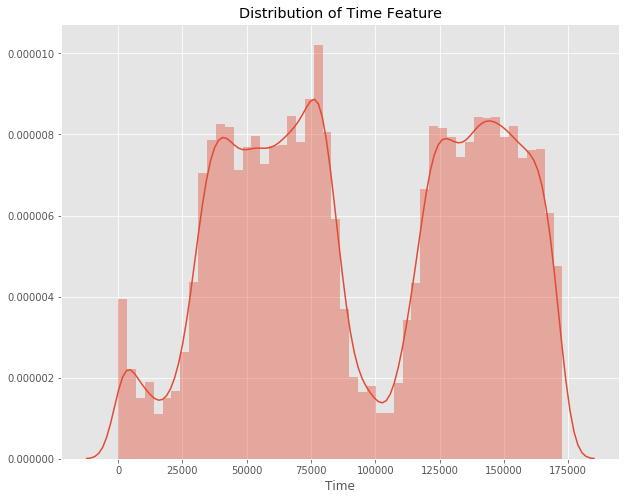

In [9]:
# visualizations of the time feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

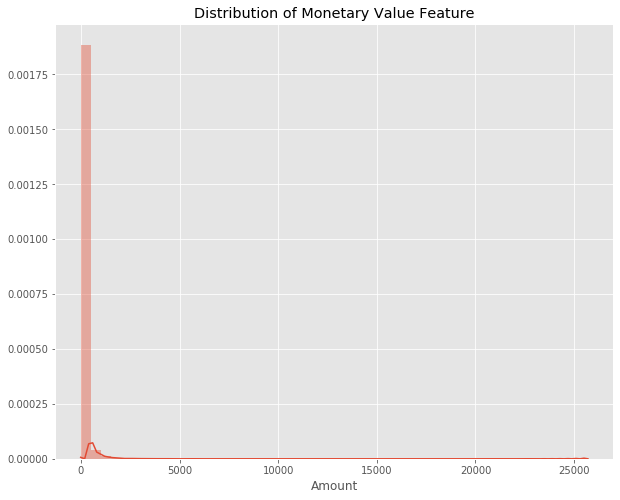

In [10]:
# visualisation of the amount feature
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

We find that - around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [11]:
# fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


### 6. Visualising the number of fraudulent and non - fraudulent transactions in the dataset

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

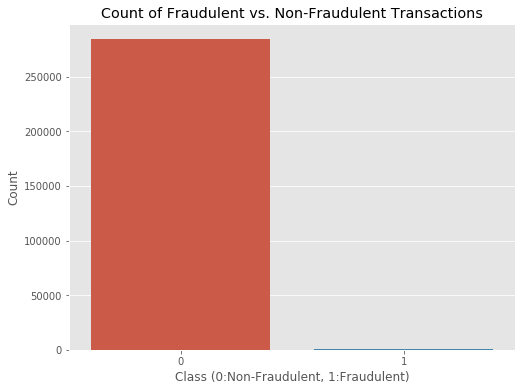

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(x = counts.index, y = counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Thus, we find that our dataset is **highly unbalanced**. <br>
The number of non - fraudulent transactions is much high compared to the fraudulent transactions.

### 7. Separating the fraudulent and non - fraudulent parts of the dataset

In [13]:
# 'Class' = 1 - fraudulent transactions
fraud = df[df['Class'] == 1]
# 'Class' = 0 - non - fraudulent or normal transactions
normal = df[df['Class'] == 0] 

In [14]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


### 8. How different are the amount of money used in different transaction classes?

In [15]:
fraud.Amount.describe()

count     492.000
mean      122.211
std       256.683
min         0.000
25%         1.000
50%         9.250
75%       105.890
max      2125.870
Name: Amount, dtype: float64

In [16]:
normal.Amount.describe()

count    284315.000
mean         88.291
std         250.105
min           0.000
25%           5.650
50%          22.000
75%          77.050
max       25691.160
Name: Amount, dtype: float64

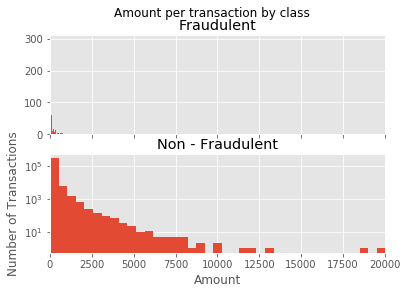

In [17]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraudulent')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Non - Fraudulent')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

### 9. Checking if fraudulent transactions occur more often during certain time frame

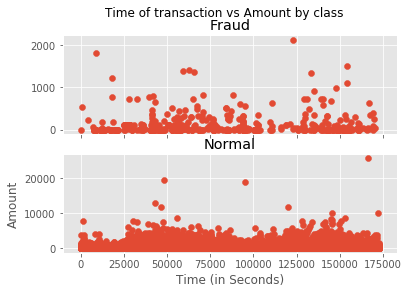

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### 10. Finding correlations - that is determining how different features affect the Class (Fraud or not)

In [19]:
corr = df.corr()
corr

Time         V1         V2         V3         V4         V5  \
Time    1.000  1.174e-01 -1.059e-02 -4.196e-01 -1.053e-01  1.731e-01   
V1      0.117  1.000e+00  4.697e-17 -1.424e-15  1.755e-17  6.391e-17   
V2     -0.011  4.697e-17  1.000e+00  2.512e-16 -1.126e-16 -2.040e-16   
V3     -0.420 -1.424e-15  2.512e-16  1.000e+00 -3.417e-16 -1.437e-15   
V4     -0.105  1.755e-17 -1.126e-16 -3.417e-16  1.000e+00 -1.941e-15   
V5      0.173  6.391e-17 -2.040e-16 -1.437e-15 -1.941e-15  1.000e+00   
V6     -0.063  2.398e-16  5.025e-16  1.432e-15 -2.713e-16  7.926e-16   
V7      0.085  1.992e-15  3.966e-16  2.169e-15  1.556e-16 -4.210e-16   
V8     -0.037 -9.491e-17 -4.414e-17  3.433e-16  5.196e-16  7.589e-16   
V9     -0.009  2.170e-16 -5.729e-17 -4.234e-16  3.860e-16  4.205e-16   
V10     0.031  7.434e-17 -4.782e-16  6.289e-16  6.055e-16 -6.602e-16   
V11    -0.248  2.439e-16  9.469e-16 -5.502e-17 -2.084e-16  7.343e-16   
V12     0.124  2.422e-16 -6.588e-16  2.207e-16 -5.658e-16  3.761e-16   
V13    -0.066 -2.115e-16  3.855e-16 -6.883e-16 -1.506e-16 -9.579e-16   
V14    -0.099  9.353e-16 -2.541e-16  4.271e-16 -8.522e-17 -3.635e-16   
V15    -0.183 -3.252e-16  2.831e-16  1.123e-16 -1.508e-16 -5.133e-16   
V16     0.012  6.309e-16  4.934e-17  1.183e-15 -6.939e-16 -3.517e-16   
V17    -0.073 -5.012e-16 -9.883e-16  4.577e-17 -4.398e-16  1.426e-16   
V18     0.090  2.870e-16  2.637e-16  5.428e-16  1.494e-16  1.110e-15   
V19     0.029  1.818e-16  9.528e-17  2.577e-16 -2.657e-16 -3.138e-16   
V20    -0.051  1.037e-16 -9.310e-16 -9.429e-16 -3.223e-16  2.076e-16   
V21     0.045 -1.755e-16  8.444e-17 -2.972e-17 -9.977e-17 -1.369e-16   
V22     0.144  7.477e-17  2.501e-16  4.648e-16  2.100e-16  5.060e-16   
V23     0.051  9.809e-16  1.060e-16  2.115e-17  6.003e-17  1.638e-16   
V24    -0.016  7.354e-17 -8.142e-18 -9.352e-17  2.230e-16 -9.286e-16   
V25    -0.233 -9.805e-16 -4.262e-17  4.771e-16  5.395e-16  5.625e-16   
V26    -0.041 -8.622e-17  2.602e-16  6.522e-16 -6.180e-16  9.145e-16   
V27    -0.005  3.208e-17 -4.478e-16  6.240e-16 -6.403e-17  4.466e-16   
V28    -0.009  9.821e-16 -3.676e-16  7.727e-16 -5.864e-17 -3.299e-16   
Amount -0.011 -2.277e-01 -5.314e-01 -2.109e-01  9.873e-02 -3.864e-01   
Class  -0.012 -1.013e-01  9.129e-02 -1.930e-01  1.334e-01 -9.497e-02   

               V6         V7         V8         V9  ...        V21        V22  \
Time   -6.302e-02  8.471e-02 -3.695e-02 -8.660e-03  ...  4.474e-02  1.441e-01   
V1      2.398e-16  1.992e-15 -9.491e-17  2.170e-16  ... -1.755e-16  7.477e-17   
V2      5.025e-16  3.966e-16 -4.414e-17 -5.729e-17  ...  8.444e-17  2.501e-16   
V3      1.432e-15  2.169e-15  3.433e-16 -4.234e-16  ... -2.972e-17  4.648e-16   
V4     -2.713e-16  1.556e-16  5.196e-16  3.860e-16  ... -9.977e-17  2.100e-16   
V5      7.926e-16 -4.210e-16  7.589e-16  4.205e-16  ... -1.369e-16  5.060e-16   
V6      1.000e+00  1.429e-16 -1.707e-16  1.114e-16  ... -1.576e-16 -3.363e-16   
V7      1.429e-16  1.000e+00 -8.692e-17  7.933e-16  ...  1.939e-16 -1.058e-15   
V8     -1.707e-16 -8.692e-17  1.000e+00  2.901e-16  ... -2.412e-16  5.476e-16   
V9      1.114e-16  7.933e-16  2.901e-16  1.000e+00  ...  4.578e-17  2.872e-17   
V10     2.851e-16  3.043e-17  9.052e-17 -2.772e-16  ...  8.090e-16 -6.708e-16   
V11     4.866e-16 -1.084e-15  1.955e-16  4.682e-16  ... -3.912e-16 -3.812e-17   
V12     2.141e-16  1.510e-15 -6.266e-17 -2.445e-15  ...  3.230e-16 -5.904e-16   
V13    -2.268e-16 -9.892e-17 -2.383e-16 -2.650e-16  ...  9.499e-17 -2.660e-17   
V14     3.453e-16 -1.729e-16 -1.131e-16  2.343e-16  ...  1.634e-17  3.440e-16   
V15    -6.368e-18  1.937e-17  2.021e-16 -1.588e-15  ...  1.947e-17 -8.937e-16   
V16    -2.478e-16  2.894e-16  5.027e-16 -3.252e-16  ... -3.927e-16  3.878e-17   
V17     3.568e-16  1.150e-15 -3.509e-16  6.536e-16  ... -7.754e-16 -8.390e-16   
V18     2.811e-16 -1.117e-16 -4.094e-16  1.204e-16  ... -1.141e-15 -8.663e-17   
V19     2.717e-16 -2.874e-16 -5.340e-16  1.121e-16  ...  4.033e-16 -9.690e-16   
V20

Text(0.5, 1, 'Heatmap of Correlation')

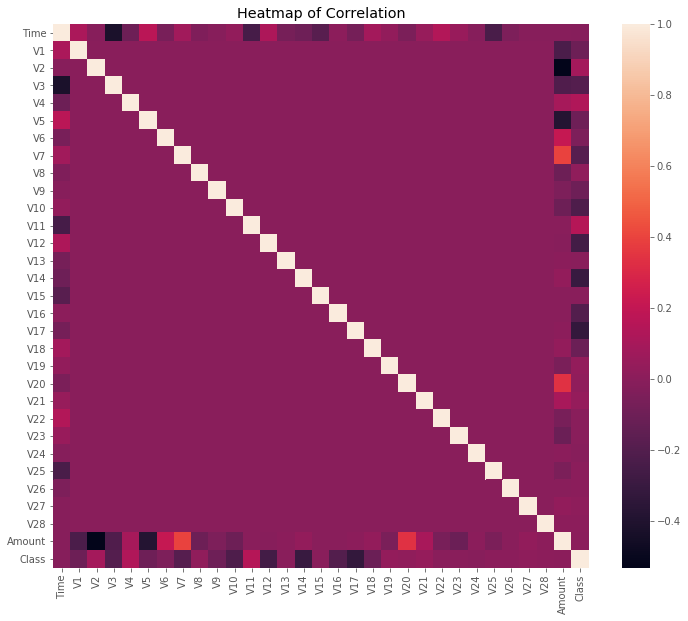

In [20]:
# heatmap - uses color in order to communicate a value to the reader.
corr = df.corr()
plt.figure(figsize = (12,10))
heat = sns.heatmap(data = corr)
plt.title('Heatmap of Correlation')

From the heatmap, we get an idea of to what degree different features contribute to the transaction being fraudulent or not.

In [21]:
# skewness
# Finding the skewness of the features 
# to ensure that they are not much deviated from the Gaussian distribution
# As presence of much skewness in features may violate our training algo assumptions
skew_ = df.skew()
skew_

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

# Data Preprocessing

### 1. Scaling Amount and Time

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
# scaling the time column
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [23]:
# scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [24]:
# concatenating newly created scaled columns with original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
# viewing a random sample of items from an axis of the object
df.sample(5)

Time     V1     V2     V3     V4     V5     V6     V7     V8  \
279203  168704.0  0.101  0.314  0.067 -0.442  0.845 -1.307  0.712 -0.231   
28507    35039.0  1.170 -0.195 -0.113 -0.039 -0.204 -0.639  0.183 -0.229   
49114    43916.0  1.044 -1.238  1.091 -0.701 -1.623  0.062 -1.174  0.117   
47811    43372.0 -0.731  1.085  0.814  1.518 -0.158 -0.400  0.445  0.097   
236573  148868.0  0.676 -4.351 -1.635 -1.014 -1.888  1.239 -0.658  0.112   

           V9  ...    V23    V24    V25    V26    V27    V28  Amount  Class  \
279203 -0.029  ...  0.214 -0.115 -0.821  0.071  0.014  0.053    1.98      0   
28507   0.128  ... -0.071 -0.395  0.246  0.845 -0.103  0.014   97.95      0   
49114  -0.565  ... -0.277  0.092  0.304 -0.059  0.031  0.048  161.00      0   
47811  -0.118  ...  0.085  0.651 -1.078 -0.475  0.037 -0.008   26.75      0   
236573 -0.649  ... -0.361 -0.390 -0.732 -0.543 -0.112  0.090  835.00      0   

        scaled_amount  scaled_time  
279203         -0.345        1.556  
28507           0.038       -1.259  
49114           0.290       -1.072  
47811          -0.246       -1.083  
236573          2.985        1.138  

[5 rows x 33 columns]

In [25]:
# dropping old (unscaled) amount and time columns
df.drop(['Amount', 'Time'], axis = 1, inplace = True)

### 2. Splitting Data into Train and Test sets

In [26]:
# manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256276, 31)
Test Shape: (28531, 31)


In [27]:
# resetting the indices 
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

### 3. Creating a subsample data set with balanced class distributions

In [28]:
# how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 443 fraudulent transactions in the train data.


In [29]:
# storing the non - fraudulent and fraudulent transactions in the train data
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [30]:
# randomly selecting 449 random non - fraudulent transactions
selected = non_fraud.sample(no_of_frauds)
selected.shape

(443, 31)

In [31]:
# printing the first 5 selected items
selected.head()

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
65788   1.270 -0.696  0.672 -0.560 -1.061 -0.097 -0.680  0.009 -0.759  0.620   
190333  1.594 -1.051 -0.695  0.331 -0.746 -0.159 -0.417  0.069  1.233 -0.108   
185339 -0.085  0.981  2.073  2.917  0.004  0.584  0.084  0.317 -0.786  0.643   
61768  -0.166  1.388 -0.279  0.905  0.198 -0.940  0.760  0.146 -0.756 -0.051   
97535   1.057 -1.843  1.206 -1.333 -2.126  0.400 -1.657  0.230 -1.603  1.418   

        ...    V22    V23    V24        V25    V26    V27    V28  Class  \
65788   ... -1.449  0.162  0.034  2.356e-04  0.725 -0.034  0.011      0   
190333  ...  0.769 -0.083 -0.404 -1.609e-01 -0.574  0.017 -0.015      0   
185339  ...  0.281  0.096 -0.083 -7.877e-01 -0.255  0.108  0.074      0   
61768   ...  0.573  0.070  0.052 -6.133e-01 -0.393  0.310  0.167      0   
97535   ...  0.840 -0.137  0.058  6.450e-02 -0.048  0.070  0.055      0   

        scaled_amount  scaled_time  
65788          -0.194       -0.838  
190333          0.438        0.919  
185339         -0.306        0.868  
61768          -0.252       -0.878  
97535           0.357       -0.504  

[5 rows x 31 columns]

In [32]:
# resetting the indices
selected.reset_index(drop = True, inplace = True)
fraud.reset_index(drop = True, inplace = True)

In [33]:
# concatenating both (449 fraud and non - fraud transactions) 
# into a subsample data set with equal class distribution
subsample = pd.concat([selected, fraud])
len(subsample) # 449 (fraud) + 449 (non - fraud) = 898

886

In [34]:
# shuffling our data set
subsample = subsample.sample(frac = 1).reset_index(drop = True)

subsample.head(10)

V1     V2      V3     V4     V5     V6      V7     V8     V9     V10  \
0  -0.408  3.133  -3.098  5.804  0.891 -0.501  -0.440  0.592 -3.268  -2.223   
1  -1.298  1.948  -4.510  1.306 -0.019 -0.509  -2.643  1.284 -2.515  -4.501   
2   1.167 -0.211   1.131  0.669 -0.870  0.209  -0.739  0.242  0.695  -0.069   
3 -10.301  6.483 -15.076  6.554 -8.880 -4.472 -14.901  3.840 -4.358 -14.533   
4  -0.805 -0.742   2.160 -0.571 -1.172  0.858  -0.009  0.137 -0.610  -0.248   
5  -5.976 -7.197  -5.388  5.105  4.677 -5.567  -4.291  0.877 -1.075  -3.273   
6   1.992  0.158  -2.583  0.409  1.151 -0.097   0.223 -0.068  0.578  -0.889   
7  -2.922 -0.228  -5.877  2.202 -1.935  0.631  -1.245  1.511 -1.900  -6.428   
8  -0.862  2.188  -1.683  0.063  0.482 -1.756   0.502  0.510 -0.501  -1.913   
9   2.001 -0.275  -0.279  0.415 -0.754 -0.846  -0.477 -0.080  1.260  -0.107   

   ...    V22    V23    V24    V25    V26    V27    V28  Class  scaled_amount  \
0  ... -0.538 -0.218 -1.043  0.314  0.543  0.234  0.120      1         -0.171   
1  ...  1.361 -0.272 -0.326  0.291  0.841  0.643  0.201      1         -0.353   
2  ... -0.017 -0.019  0.052  0.269  0.320  0.013  0.013      0         -0.328   
3  ...  1.042 -0.683  0.574 -1.602 -0.394 -0.469  0.106      1         -0.349   
4  ...  0.909 -0.057 -0.364  0.680  0.186  0.055  0.086      0          0.446   
5  ... -0.136  0.848 -0.270 -1.095 -0.711  0.566 -1.034      1          0.830   
6  ... -0.295 -0.072 -0.450  0.313 -0.290  0.003 -0.015      1         -0.183   
7  ...  0.896  1.386 -2.028  0.509  0.173  0.727  0.235      1          2.538   
8  ...  0.825 -0.182 -0.160 -0.378 -0.155  0.114  0.216      0         -0.349   
9  ... -0.322  0.384 -0.015 -0.462 -0.616  0.031 -0.032      0         -0.349   

   scaled_time  
0        1.369  
1        0.928  
2       -1.156  
3       -0.019  
4       -1.059  
5        1.344  
6        1.591  
7        0.950  
8        1.512  
9        1.183  

[10 rows x 31 columns]

### 4. Visualisation of fraud and non - fraud classes in subsample dataset created

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

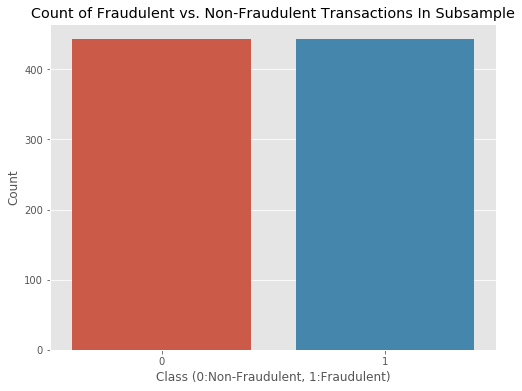

In [35]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

We find that, the distribution of fraud and non - fraud transactions is balanced in our subsample dataset unlike the original highly unbalanced dataset

In [36]:
# taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.440
V2             0.496
V3            -0.575
V4             0.696
V5            -0.386
V6            -0.388
V7            -0.484
V8             0.050
V9            -0.553
V10           -0.627
V11            0.687
V12           -0.684
V13           -0.038
V14           -0.755
V15           -0.061
V16           -0.607
V17           -0.568
V18           -0.477
V19            0.300
V20            0.190
V21            0.132
V22            0.010
V23            0.013
V24           -0.140
V25            0.049
V26            0.097
V27            0.078
V28            0.065
Class          1.000
scaled_amount  0.087
scaled_time   -0.131

In [37]:
# negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.575
V9  -0.553
V10 -0.627
V12 -0.684
V14 -0.755
V16 -0.607
V17 -0.568

In [38]:
# positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.696
V11    0.687
Class  1.000

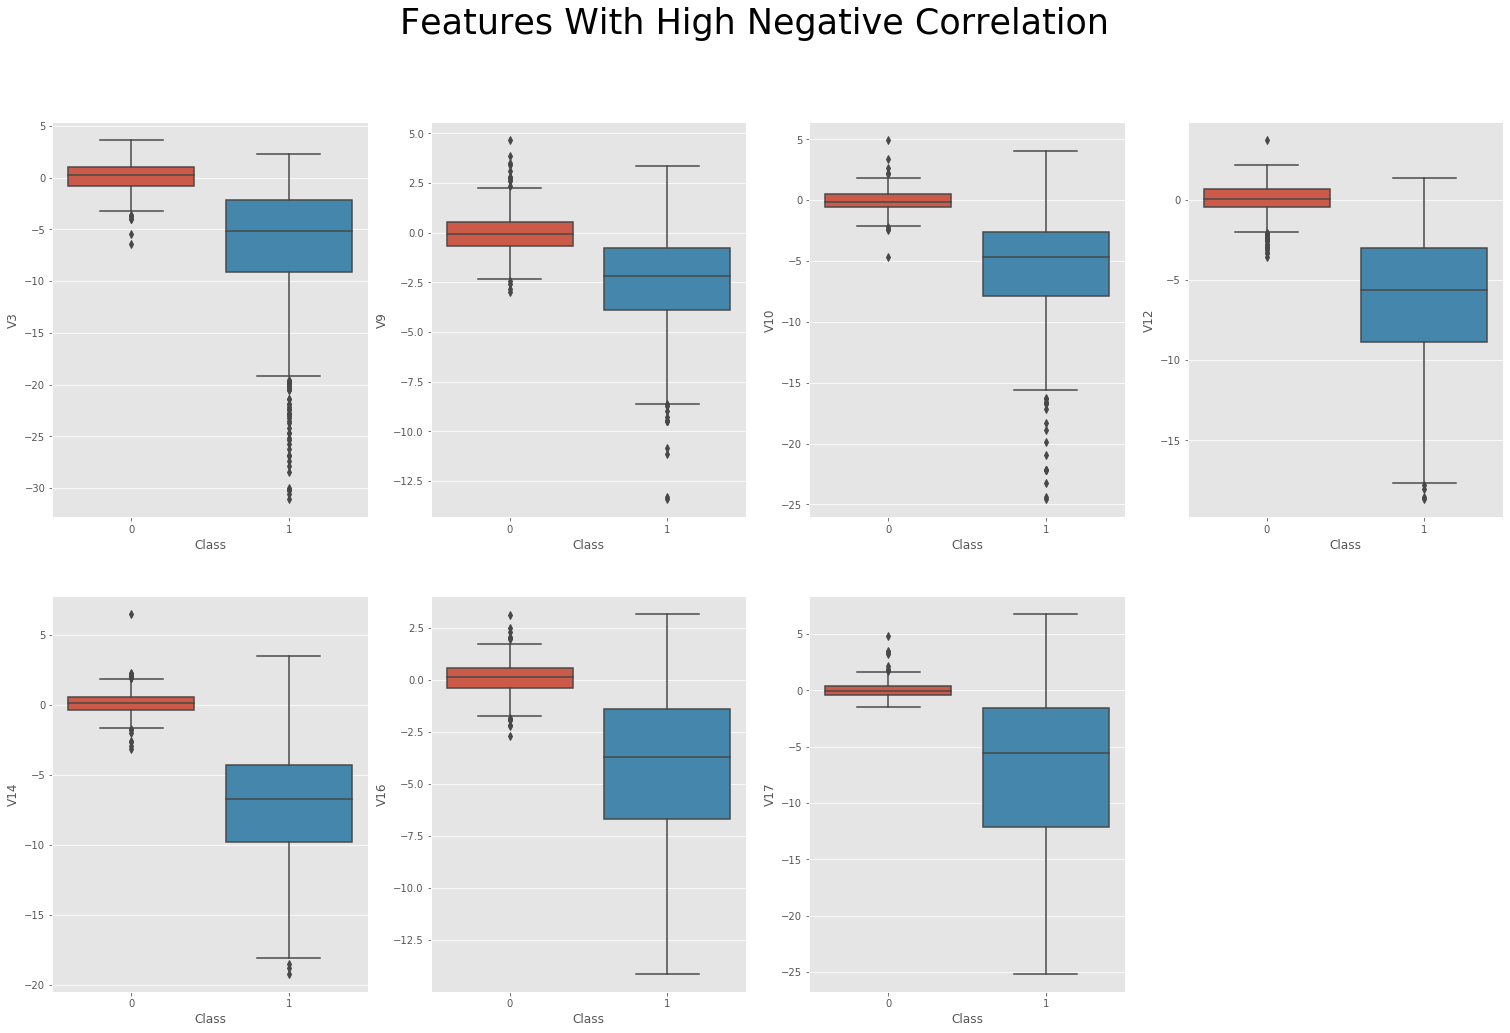

In [39]:
# visualizing the features with high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

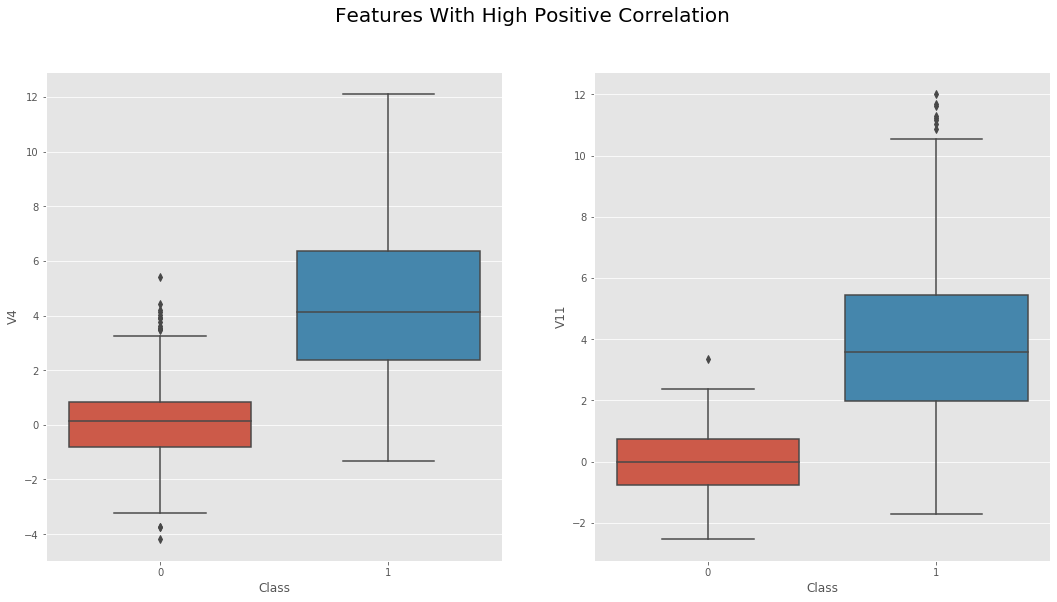

In [40]:
# visualizing the features with high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

### 5. Extreme Outlier Removal

In [41]:
# Only removing the extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [42]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 886 transactions by 255 transactions to 631 transactions.


### 6. Dimensionality Reduction

In [43]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [44]:
# t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

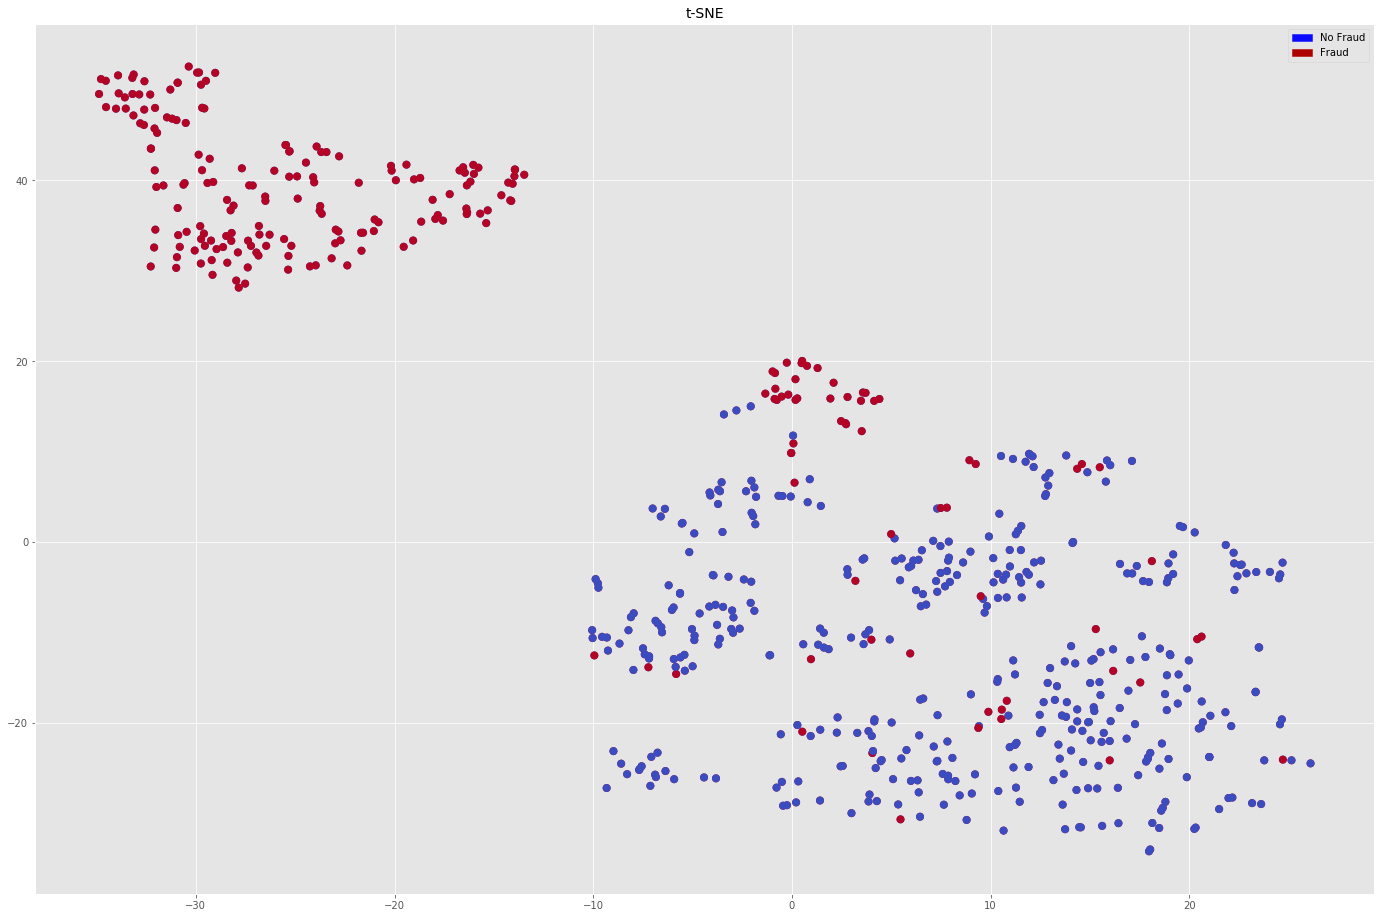

In [45]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


# Classification Algorithms

In [46]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [47]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [49]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (504, 30) (127, 30) 

Y_shapes:
 Y_train: Y_validation:
 (504,) (127,)


In [50]:
conda install -c anaconda py-xgboost

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


## Spot - Checking Algorithms 

Spot-checking algorithms is about getting a quick assessment of a bunch of different algorithms on your machine learning problem so that you know what algorithms to focus on and what to discard.

In [52]:
# Spot - Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

In [53]:
# testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.973290 (0.020865)
LDA: 0.969760 (0.021616)
KNN: 0.951995 (0.029016)
CART: 0.886033 (0.026291)
SVM: 0.967156 (0.027142)
XGB: 0.969645 (0.018063)
RF: 0.970105 (0.024643)


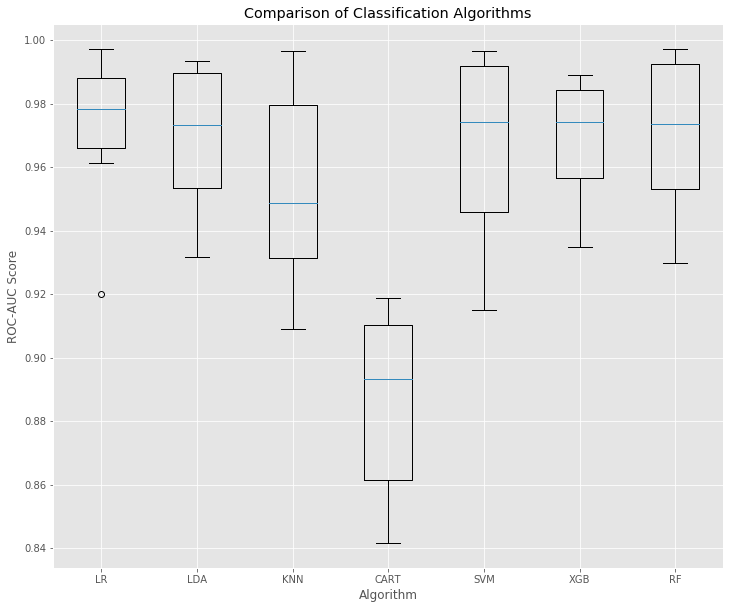

In [54]:
# Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

We find that RF with XGBOOST gives the greatest test accuracy and hence proceed with this algorithm to train our model

In [55]:
conda install -c anaconda graphviz 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [67]:
# visualizing RF
RandomForest_model = RandomForestClassifier(n_estimators = 10)

# Train
RandomForest_model.fit(X_train, y_train)

# Extract single tree
estimator = RandomForest_model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [68]:
# testing the model 
RandomForest_predict = RandomForest_model.predict(X_test)

In [69]:
# printing the test set results
print(RandomForest_predict)

[1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0]


In [120]:
# Checking different accuracies for the RF model

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,recall_score

rf_accuracy = accuracy_score(y_test, RandomForest_predict)
rf_recall = recall_score(y_test, RandomForest_predict)
rf_cm = confusion_matrix(y_test, RandomForest_predict)
rf_auc = roc_auc_score(y_test, RandomForest_predict)

print("Model has a Score Accuracy: {:.3%}".format(rf_accuracy))
print("Model has a Score Recall: {:.3%}".format(rf_recall))
print("Model has a Score ROC AUC: {:.3%}".format(rf_auc))

Model has a Score Accuracy: 96.063%
Model has a Score Recall: 89.130%
Model has a Score ROC AUC: 94.565%


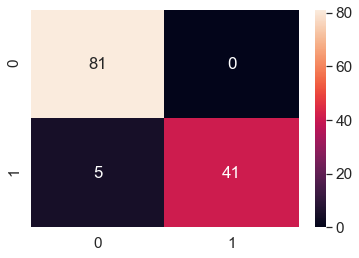

In [121]:
import seaborn as sns
sns.heatmap(rf_cm, annot=True)

Here, 0 indicates non - fraudulent transactions and 1 indicates fraudulent transactions. As seen from the confusion matrix, our RF model correctly predicted **81** transactions as non - fraudulent ( **True Negatives** ) and **41** transactions as fraudulent ( **True Positives** ). Whereas, **5** transactions which were fraudulent are predicted to be non - fraudulent ( **False Negatives** ) but **no** non - fraudulent transaction is predicted to be fraudulent ( **False positives** ). This can be visualised better as follows -

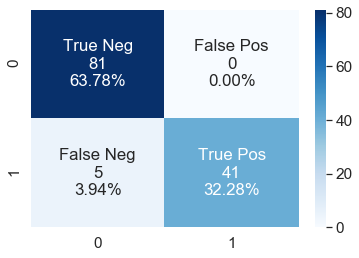

In [123]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                rf_cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     rf_cm.flatten()/np.sum(rf_cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rf_cm, annot=labels, fmt='', cmap='Blues')

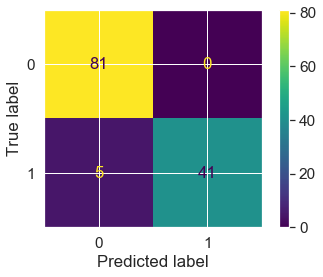

In [125]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RandomForest_model , X_test, y_test)
plt.show()

Thus, random forest model performs fairly well for the given highly unbalanced dataset. But, we have 5 false negatives here. That is, the fraudulent transactions are detected to be safe or normal ones, which is not a good measure. Therefore, we try improving the results further by using XGBoost Algorithm.